In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
PATH_TO_DATA = "hashspeed.csv"
AMOUNT = [100]

In [11]:
logs = pd.read_csv(PATH_TO_DATA)
logs

,Function,Duration,Amount
0,SortedArray,110,10000
1,searchSameSort,30,10000
2,searchSameSort,30,10000
3,searchSameSort,20,10000
4,searchSameSort,20,10000
...,...,...,...
22220007,removeSameHash,20,1000000
22220008,removeSameHash,20,1000000
22220009,removeSameHash,30,1000000
22220010,removeSameHash,20,1000000


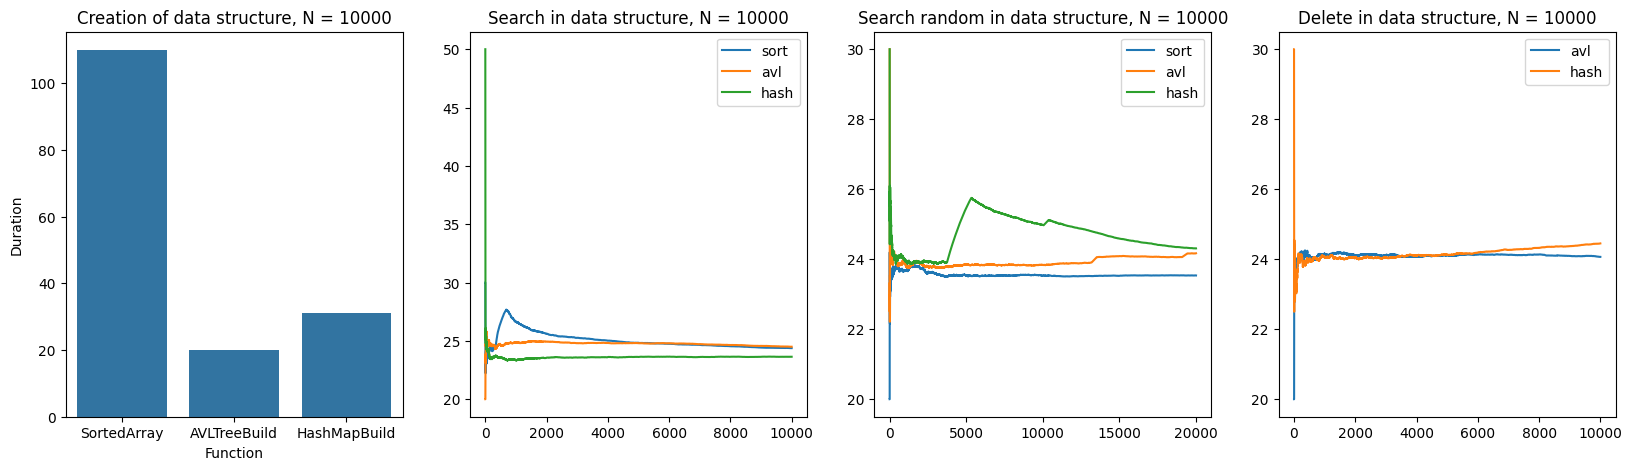

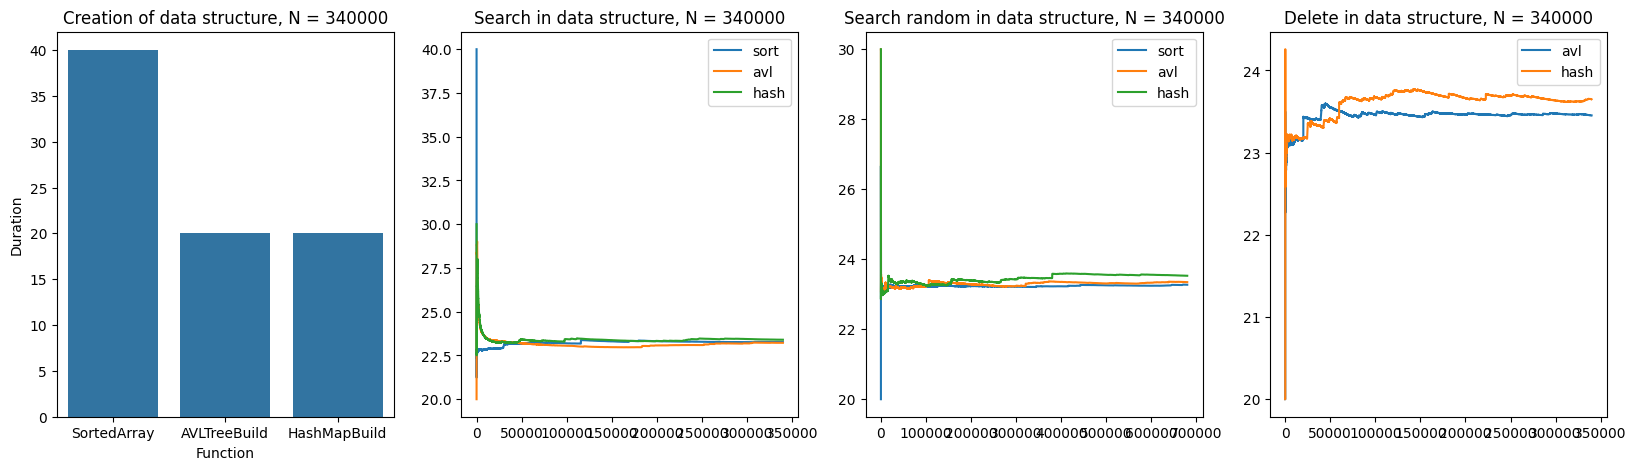

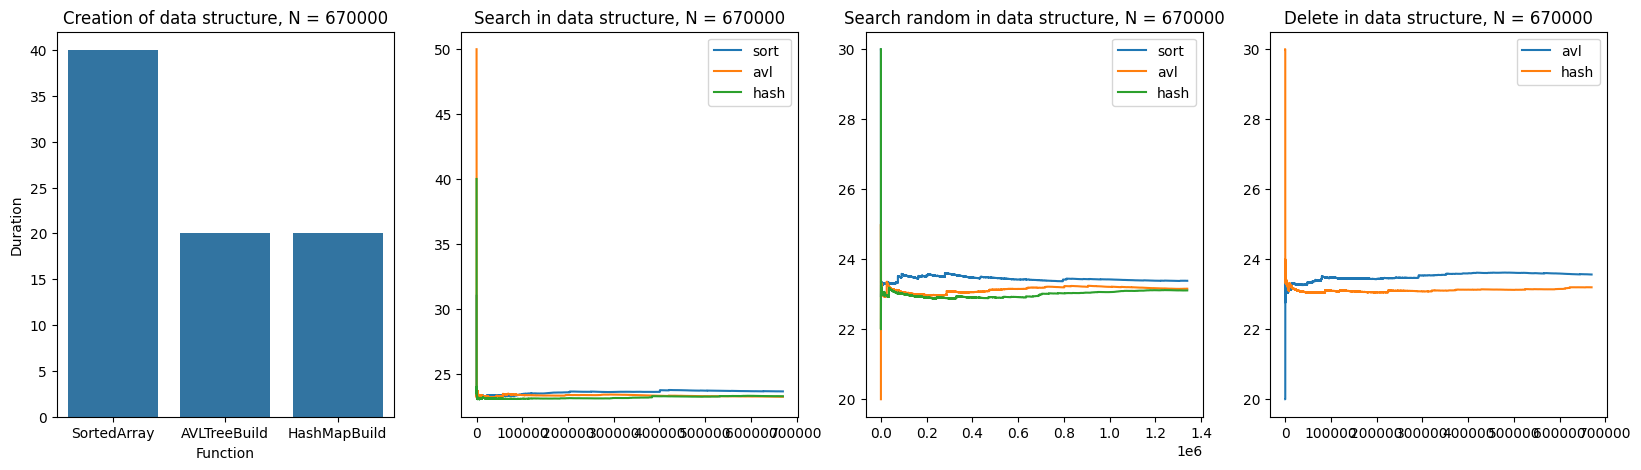

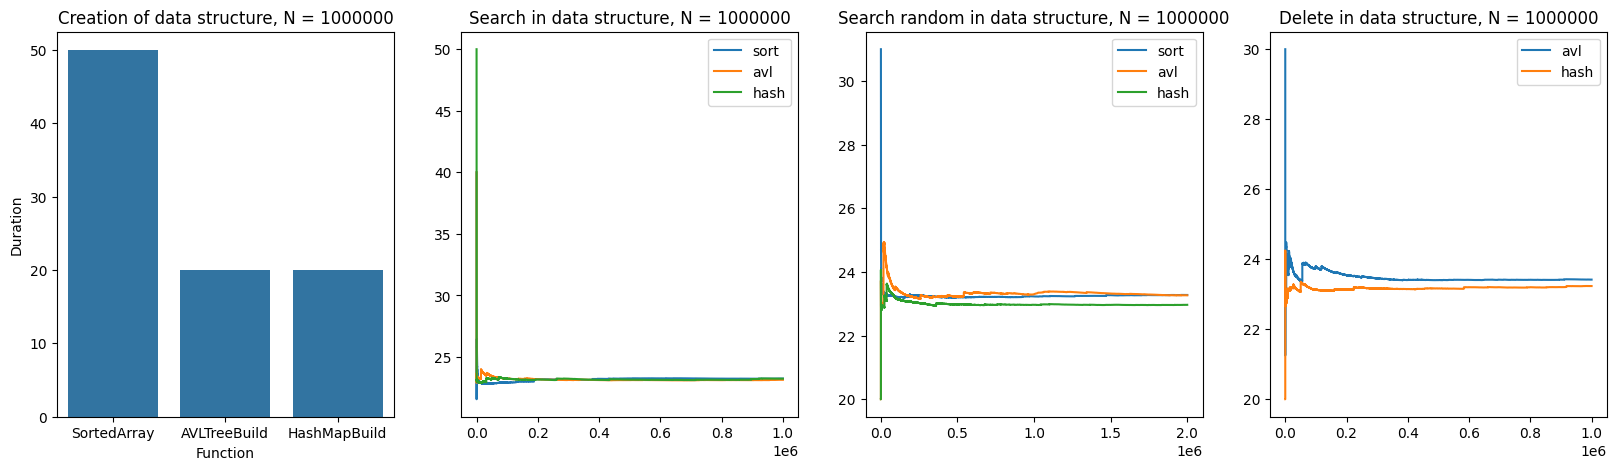

In [16]:
uniq = len(logs.Amount.unique())
for i, N in enumerate(logs.Amount.unique()):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plt.title("Creation of data structure, N = " + str(N))
    hist_filtered = logs[logs.Function.isin(["SortedArray", "AVLTreeBuild", "HashMapBuild"])]
    hist_filtered = hist_filtered[hist_filtered.Amount == N]
    sns.barplot(hist_filtered, x="Function", y="Duration")

    plt.subplot(1, 4, 2)
    plt.title("Search in data structure, N = " + str(N))
    search_filtered = logs[logs.Function.isin(["searchSameSort", "searchSameHash", "searchSameAVL"])]
    search_filtered = search_filtered[search_filtered.Amount == N]
    sort_search = search_filtered[search_filtered["Function"] == "searchSameSort"]["Duration"]
    avl_search = search_filtered[search_filtered["Function"] == "searchSameAVL"]["Duration"]
    hash_search = search_filtered[search_filtered["Function"] == "searchSameHash"]["Duration"]
    plt.plot(np.arange(1, len(sort_search) + 1), np.cumsum(sort_search) / np.arange(1, len(sort_search) + 1), label="sort")
    plt.plot(np.arange(1, len(avl_search) + 1), np.cumsum(avl_search) / np.arange(1, len(sort_search) + 1), label="avl")
    plt.plot(np.arange(1, len(hash_search) + 1), np.cumsum(hash_search) / np.arange(1, len(sort_search) + 1), label="hash")
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.title("Search random in data structure, N = " + str(N))
    search_filtered = logs[logs.Function.isin(["searchRandomSort", "searchRandomHash", "searchRandomAVL"])]
    search_filtered = search_filtered[search_filtered.Amount == N]
    sort_search = search_filtered[search_filtered["Function"] == "searchRandomSort"]["Duration"]
    avl_search = search_filtered[search_filtered["Function"] == "searchRandomAVL"]["Duration"]
    hash_search = search_filtered[search_filtered["Function"] == "searchRandomHash"]["Duration"]
    plt.plot(np.arange(1, len(sort_search) + 1), np.cumsum(sort_search) / np.arange(1, len(sort_search) + 1), label="sort")
    plt.plot(np.arange(1, len(avl_search) + 1), np.cumsum(avl_search) / np.arange(1, len(avl_search) + 1), label="avl")
    plt.plot(np.arange(1, len(hash_search) + 1), np.cumsum(hash_search) / np.arange(1, len(hash_search) + 1), label="hash")
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.title("Delete in data structure, N = " + str(N))
    search_filtered = logs[logs.Function.isin(["removeSameAVL", "removeSameHash"])]
    search_filtered = search_filtered[search_filtered.Amount == N]
    avl_search = search_filtered[search_filtered["Function"] == "removeSameAVL"]["Duration"]
    hash_search = search_filtered[search_filtered["Function"] == "removeSameHash"]["Duration"]
    plt.plot(np.arange(1, len(avl_search) + 1), np.cumsum(avl_search) / np.arange(1, len(avl_search) + 1), label="avl")
    plt.plot(np.arange(1, len(hash_search) + 1), np.cumsum(hash_search) / np.arange(1, len(hash_search) + 1), label="hash")
    plt.legend()

    plt.savefig(f'images/{i + 1}.png')
